In [1]:
import random
import numpy as np
import matplotlib
import numba
import time
import multiprocessing as mp
from numba import jit, prange
from numba import config, njit, threading_layer
from matplotlib import pyplot as plt

In [132]:
#random.seed(1235)
#Demand function from Klein (2020)
def PD_rewards(p1,p2,):
    x = np.array(
            [[(3,3), (0,5)],
            [(5,0), (1,1)]]
             )
    val_p1, val_p2 = x[p1,p2]
    
    return val_p1, val_p2
        

In [133]:

def q_player(prices, Q, epsilon, p2,t):
    if random.uniform(0,1) < epsilon:
        p3 = int(np.random.choice(len(prices)))
        #print('now its random', epsilon)
    else:
        #p3, pyt = np.unravel_index(np.argmax(Q),Q.shape)
        p3 = int(np.argmax(Q[t,:,p2]))
    return p3

In [134]:
def npc_player(options, q_table, epsilon, prev, time):
    if prev[time-1]==0 and prev[time]==0:
        npc_choice = 0
    else:
        npc_choice = 1
    return npc_choice

In [141]:

def update(Q, prev, alpha, delta, prices, prev_time, time, indic):
        my_old_price = prev[0,0]
        their_old_price = prev[1,0]
        their_new_choice = prev[1,1]
        print('indices',prev[0,0],prev[1,0],prev_time)
        print('prices', my_old_price, their_new_choice, their_old_price)
        prev_q_est = Q[prev_time, prev[0,0],prev[1,0]]
        print('PD_reward', PD_rewards(my_old_price,their_old_price))
        print('argmax i Q', Q[time, np.argmax(Q[time,:,prev[1,1]]),prev[1,1]])
        new_q_est = PD_rewards(my_old_price,their_old_price)[0] + delta* PD_rewards(my_old_price,their_new_choice)[0] + delta ** 2 * Q[time, np.argmax(Q[time,:,prev[1,1]]),prev[1,1]]

        Q[time, prev[0,0], prev[1,0]] = (1-alpha) * prev_q_est + alpha * new_q_est


In [142]:


def PD_game(q_table, options, periods, alpha, theta, delta):
    a = len(options)
    dim_interval = periods/10
    
    prev_choices = np.zeros((2,2), dtype=int)
    reward_arr = np.zeros(int(periods-2))
    reward_arr_p2 = np.zeros(int(periods-2))
    all_choices1 =np.zeros(int(periods/2)-1)
    all_choices2 =np.zeros(int(periods/2)-1)
    i_counter = 0
    j_counter = 0
    t=3
    if np.shape(q_table) != (10,a,a):
        print("Wrong dimensions")
    else:
        for t in range(t, periods+1):
        
            epsilon = (1-theta)**t
            if t % 2 != 0: 
                time_for_q = int(np.floor(t/dim_interval))
                prev_time_for_q = int(np.floor((t-1)/dim_interval))
                print('time for q', time_for_q, 'prev time for q', prev_time_for_q)
                update(q_table, prev_choices, alpha, delta, options, prev_time_for_q, time_for_q, 1)
                
                
                p_i = q_player(options, q_table, epsilon, prev_choices[1,1], time_for_q)
                
                prev_choices[0,0] = prev_choices[0,1]
                prev_choices[0,1] = p_i
                prev_choices[1,0] = prev_choices[1,1]
                all_choices1[i_counter] = (options[p_i])
                i_counter += 1
                #print('Spiller 1 tur: p:', prices[p_i],' p_j: ', prices[prev_p[1,1]],'iteration:', t,'Q_table: \n', Q_table)
                reward_arr[t-3], reward_arr_p2[t-3] = PD_rewards(prev_choices[0,1], prev_choices[1,1])
            else: 
                p_j= npc_player(options, q_table, 0, all_choices1,j_counter)
                
                prev_choices[1,0] = prev_choices[1,1]
                prev_choices[1,1] = p_j
                prev_choices[0,0] = prev_choices[0,1]
                all_choices2[j_counter] = (options[p_j])
                j_counter += 1
                #print('Spiller 2 tur: p:', prices[p_j], 'p_i', prices[prev_p[0,1]],' iteration: ', t,'Q_table2: \n', Q_table2)
                reward_arr[t-3], reward_arr_p2[t-3] = PD_rewards(prev_choices[0,1], prev_choices[1,1])
                #step_counter +=1
    print()
    return all_choices1, all_choices2, reward_arr, reward_arr_p2, q_table





    
    

In [149]:

Q = np.zeros((10,2,2))
options = np.array([0,1])
all_choices1, all_choices2, reward_arr, reward_arr_p2, q_table = PD_game(Q, options, 10000, 0.3, 0.000322, 0.95)



time for q 0 prev time for q 0
indices 0 0 0
prices 0 0 0
PD_reward (3, 3)
argmax i Q 0.0
time for q 0 prev time for q 0
indices 0 0 0
prices 0 0 0
PD_reward (3, 3)
argmax i Q 1.755
time for q 0 prev time for q 0
indices 0 0 0
prices 0 0 0
PD_reward (3, 3)
argmax i Q 3.4586662499999994
time for q 0 prev time for q 0
indices 0 0 0
prices 0 0 0
PD_reward (3, 3)
argmax i Q 5.112500262187499
time for q 0 prev time for q 0
indices 0 0 0
prices 0 0 0
PD_reward (3, 3)
argmax i Q 6.717959629518514
time for q 0 prev time for q 0
indices 0 0 0
prices 0 0 0
PD_reward (3, 3)
argmax i Q 8.276459310355097
time for q 0 prev time for q 0
indices 0 0 0
prices 0 0 0
PD_reward (3, 3)
argmax i Q 9.78937287552721
time for q 0 prev time for q 0
indices 0 0 0
prices 0 0 0
PD_reward (3, 3)
argmax i Q 11.258033718918039
time for q 0 prev time for q 0
indices 1 0 0
prices 1 1 0
PD_reward (5, 0)
argmax i Q 0.0
time for q 0 prev time for q 0
indices 0 1 0
prices 0 1 1
PD_reward (0, 5)
argmax i Q 0.0
time for q 0 

 0 prev time for q 0
indices 0 0 0
prices 0 0 0
PD_reward (3, 3)
argmax i Q 15.62630327781044
time for q 0 prev time for q 0
indices 1 0 0
prices 1 1 0
PD_reward (5, 0)
argmax i Q 13.6149545359334
time for q 0 prev time for q 0
indices 0 1 0
prices 0 1 1
PD_reward (0, 5)
argmax i Q 13.6149545359334
time for q 0 prev time for q 0
indices 1 1 0
prices 1 1 1
PD_reward (1, 1)
argmax i Q 13.216717115757346
time for q 0 prev time for q 0
indices 0 1 0
prices 0 1 1
PD_reward (0, 5)
argmax i Q 13.31587859616784
time for q 0 prev time for q 0
indices 1 1 0
prices 1 1 1
PD_reward (1, 1)
argmax i Q 13.31587859616784
time for q 0 prev time for q 0
indices 0 1 0
prices 0 1 1
PD_reward (0, 5)
argmax i Q 13.511389147229929
time for q 0 prev time for q 0
indices 0 1 0
prices 0 0 1
PD_reward (0, 5)
argmax i Q 16.924233906934482
time for q 0 prev time for q 0
indices 0 0 0
prices 0 0 0
PD_reward (3, 3)
argmax i Q 16.924233906934482
time for q 0 prev time for q 0
indices 0 0 0
prices 0 0 0
PD_reward (3, 

In [150]:
def moving_avg(fst_arr, snd_arr, window_size):

    moving_averages = []
    moving_averages2 = []
    i = 0
    while i < len(fst_arr) - window_size + 1:
    
        # Calculate the average of current window
        window_average = np.sum(fst_arr[
        i:i+window_size]) / window_size
        window_average2 = np.sum(snd_arr[
        i:i+window_size]) / window_size
        
        # Store the average of current
        # window in moving average list
        moving_averages.append(window_average)
        moving_averages2.append(window_average2)

        
        # Shift window to right by one position
        i += 1
    return moving_averages, moving_averages2

def prof_means(prof_arr1, prof_arr2):
    return np.mean(prof_arr1, axis=0), np.mean(prof_arr2, axis=0)

In [151]:
avg_prof_arr, avg_prof_arr2 = moving_avg(reward_arr, reward_arr_p2, 100)
print(avg_prof_arr, avg_prof_arr2)

[1.42, 1.39, 1.36, 1.33, 1.33, 1.35, 1.33, 1.31, 1.29, 1.27, 1.25, 1.22, 1.19, 1.16, 1.16, 1.14, 1.16, 1.19, 1.22, 1.27, 1.25, 1.2, 1.19, 1.2, 1.21, 1.2, 1.19, 1.19, 1.19, 1.18, 1.17, 1.16, 1.18, 1.21, 1.24, 1.27, 1.27, 1.25, 1.27, 1.3, 1.33, 1.35, 1.37, 1.42, 1.43, 1.44, 1.42, 1.38, 1.38, 1.39, 1.4, 1.39, 1.38, 1.38, 1.41, 1.44, 1.44, 1.42, 1.44, 1.46, 1.48, 1.53, 1.54, 1.54, 1.54, 1.53, 1.52, 1.51, 1.53, 1.57, 1.57, 1.57, 1.57, 1.57, 1.57, 1.58, 1.56, 1.54, 1.52, 1.47, 1.46, 1.46, 1.49, 1.52, 1.52, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.64, 1.64, 1.65, 1.66, 1.65, 1.64, 1.64, 1.67, 1.71, 1.71, 1.71, 1.71, 1.71, 1.71, 1.71, 1.71, 1.71, 1.71, 1.7, 1.69, 1.7, 1.71, 1.71, 1.68, 1.65, 1.65, 1.65, 1.65, 1.63, 1.65, 1.68, 1.71, 1.75, 1.75, 1.76, 1.77, 1.76, 1.75, 1.76, 1.77, 1.77, 1.74, 1.72, 1.7, 1.67, 1.64, 1.61, 1.61, 1.63, 1.61, 1.58, 1.55, 1.5, 1.52, 1.56, 1.56, 1.55, 1.54, 1.54, 1.54, 1.54, 1.54, 1.55, 1.53, 1.5, 1.47, 1.44, 1.44, 1.46, 1.44, 1.39, 1.38, 1.37, 1.39, 1.42, 1.45, 1.48, 1.4

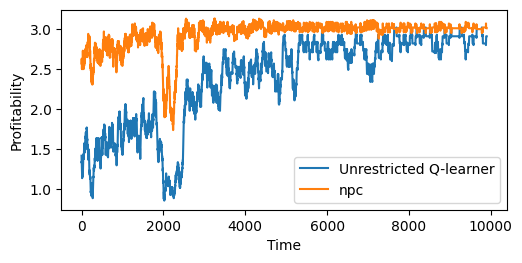

In [152]:
t_arr1 = np.arange(0,9899)
t_arr2 = np.arange(0,9899)
fig, ax = plt.subplots(figsize =(5.75, 2.6))
plt.plot(t_arr1,avg_prof_arr,'-',label='Unrestricted Q-learner')
plt.plot(t_arr2,avg_prof_arr2,'-', label='npc')
#plt.axhline(y=0.125, color='k', linestyle = '--')
#plt.axhline(y=0.061, color='k', linestyle = '--')
plt.xlabel("Time")
plt.ylabel("Profitability")
#plt.ylim(0.00,0.15)
plt.legend()
plt.show()

In [153]:
print(q_table)

[[[57.35559155 49.68219822]
  [49.45033704 44.96957695]]

 [[59.26335598 51.20626294]
  [51.24626038 44.64644842]]

 [[58.47423078 50.04574614]
  [51.8176584  45.54847447]]

 [[59.99624021 52.24496549]
  [53.63757278 49.00137198]]

 [[59.99703501 51.25042288]
  [53.25368767 46.03836251]]

 [[59.99965025 52.60325636]
  [53.57067288 34.55339709]]

 [[59.99976919 53.34398141]
  [53.95861287 25.41013786]]

 [[59.99977594 52.74448515]
  [51.97470315 38.71796152]]

 [[59.99991334 52.93597702]
  [51.39548169 13.32537593]]

 [[59.99994281 52.21031014]
  [47.49132894  0.        ]]]
